In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
v0 = 20
g = - 9.81
y0 = 100

# Solution 1

There is a vertical maximum displacement $Y(\theta)$:

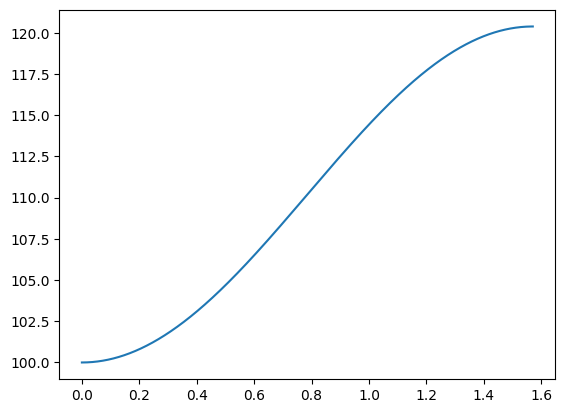

In [123]:
theta = np.linspace(0, np.pi/2, int(1e4))
Y = y0 - v0**2 * np.sin(theta)**2 / (2*g)

plt.plot(theta, Y)
plt.show()

This also has a maximum value for a certain trajectory:

In [124]:
Y_max = Y.max()
Y_max

np.float64(120.38735983690111)

Maximum distance $X(\theta)$ for each trajectory:

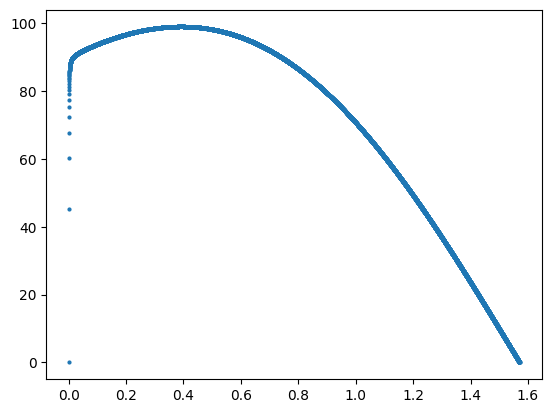

In [125]:
Y = Y[Y != y0]
theta = theta[theta != np.pi/2]

X = - (v0**2 * np.sin(theta) * np.cos(theta) / g) * (1 + np.sqrt(Y / (Y-y0)))

plt.plot(theta, X, "o", markersize=2)
plt.show()

This function has a maximum that represents the maximum distance that a single trajectory could reach:

In [126]:
X_max = X.max()
print("Maximum posible distance:", X_max)

Maximum posible distance: 99.05204190774195


Let's draw the set of possible trajectory that the particles follow:

(-4.952602095387098, 99.05204190774195)

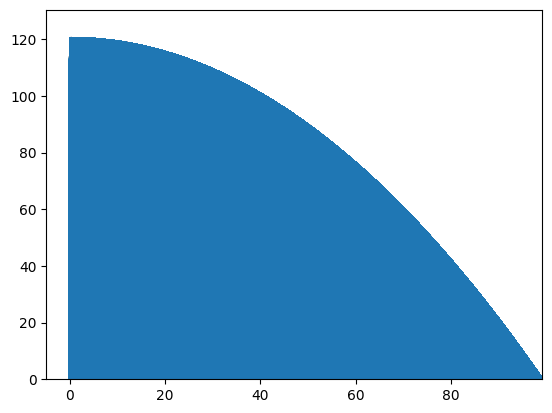

In [221]:
theta = np.linspace(0, np.pi/2, int(1e5))
x = np.linspace(0, X_max, int(1e3))

y_set = y0 + np.tan(theta[:, np.newaxis])*x + 0.5*g*(1 + np.tan(theta[:, np.newaxis])**2)*x**2 / v0**2

k = 0
for th in theta:
    plt.plot(x, y_set[k, :], color="tab:blue")
    k += 1

plt.ylim(top=Y_max+10, bottom=0)
plt.xlim(right=X_max)

1


(0.0, 104.00464400312904)

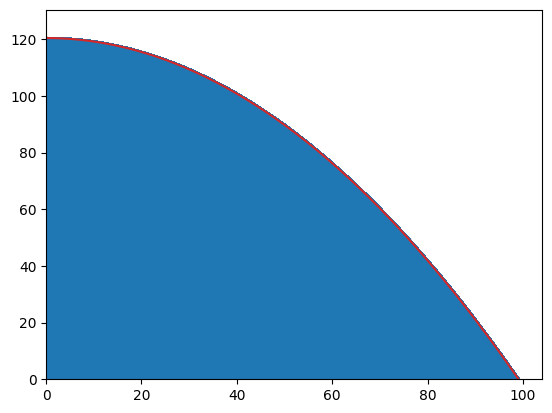

In [222]:
y_c = y_set.max(axis=0)
max_idx = np.argmax(y_c)
print(max_idx)

y_c[np.arange(len(y_c)) <= max_idx] = y_c.max()

k = 0
for th in theta:
    plt.plot(x, y_set[k, :], color="tab:blue")
    k += 1

plt.plot(x, y_c, color="tab:red")

plt.ylim(top=Y_max+10, bottom=0)
plt.xlim(left=0)



In [223]:
widths = - (y_c[1:] - y_c[:-1])
heights = y_c[:-1]

area = sum(widths * heights)

print("Area:", 2*2*np.pi*area)

Area: 91184.05276896247


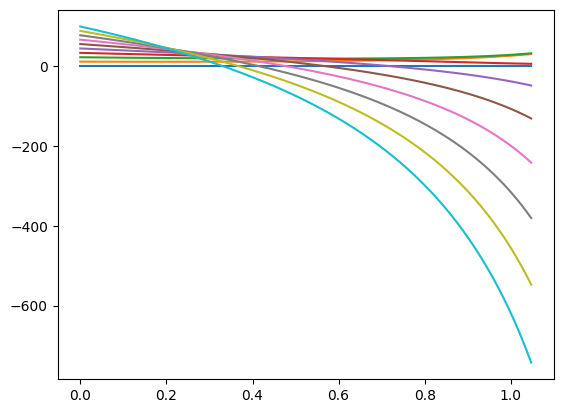

In [229]:
theta = np.linspace(0, np.pi/3, 100)
x = np.linspace(0, X_max, 10)

D = (1 + np.tan(theta)**2) * x[:, np.newaxis] + g * x[:, np.newaxis]**2 * np.tan(theta) * (1 + np.tan(theta)) / v0**2

k = 0
for i in x:
    plt.plot(theta, D[k, :])
    k += 1

# Solution 2

Draw $Y(\theta)$

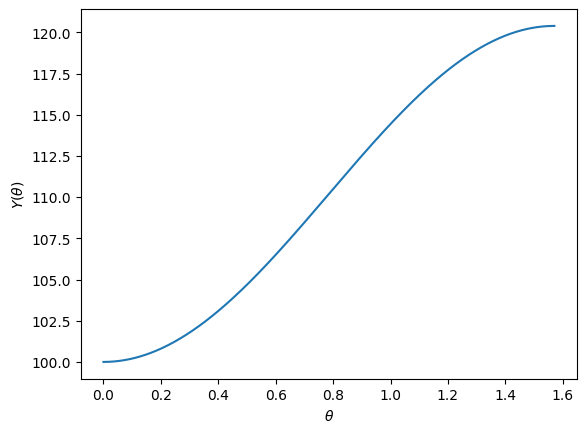

In [35]:
theta = np.linspace(0, np.pi/2, int(1e5))
Y = y0 - (v0*np.sin(theta))**2 / (2*g)

plt.plot(theta, Y)
plt.xlabel(r"$\theta$")
plt.ylabel(r"$Y(\theta)$")
plt.show()

Draw $X(\theta)$

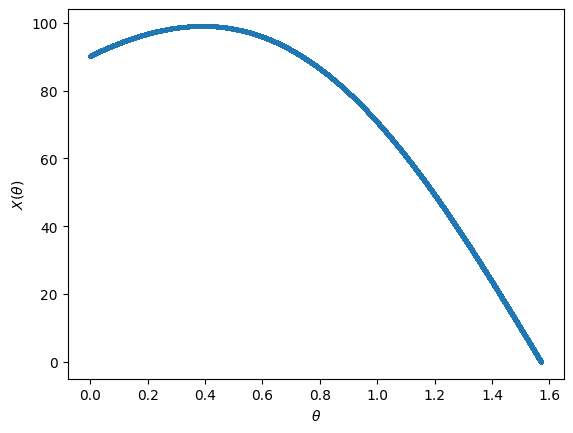

In [36]:
theta = theta[1:]
Y = Y[1:]

X = - v0**2*np.sin(theta)*np.cos(theta)*(1 + np.sqrt(Y/(Y - y0))) / g

plt.plot(theta, X, "o", markersize=2)
plt.xlabel(r"$\theta$")
plt.ylabel(r"$X(\theta)$")
plt.show()

In [38]:
X_max = X.max()
X_max

np.float64(99.08340778911585)

#### Maximum of $X(\theta)$

In [7]:
theta_int = (0.3, 0.5)
tol = 1e-7

def Yfunc(a):
    return y0 - (v0*np.sin(a))**2 / (2*g)

def Xfunc(a):
    return - v0**2*np.sin(a)*np.cos(a)*(1 + np.sqrt(Yfunc(a)/(Yfunc(a) - y0))) / g

# print("Initial values:", Xfunc(theta_int[0]), Xfunc(theta_int[1]))

# Algorithm for the maximum value
x1 = theta_int[0]
x2 = theta_int[1]

while np.abs(x1 - x2) >= tol:
    xm = (x1 + x2) / 2
    ym = Xfunc(xm)
    if ym > Xfunc(x2):
        x2 = xm
    else:
        x1 = xm

X_max = ym
theta_max = xm
print("Maximum of X:", (theta_max, X_max))


Maximum of X: (0.38749990463256834, np.float64(99.08283975701708))


#### Draw $y(x; \theta)$

In [8]:
x_val = np.linspace(1e-12, X_max, 10)
theta = np.linspace(0, np.pi/2, int(1e5))
theta = theta[1:]

for x in x_val:
    theta_val = theta[Xfunc(theta) >= x]
    th_max = theta_max(x)

    y_val = y0 + np.tan(theta_val)*x + g*(1 + np.tan(theta_val)**2)*x**2 / (2*v0**2)
    plt.plot(theta_val, y_val)

    y_val = y0 + np.tan(th_max)*x + g*(1 + np.tan(th_max)**2)*x**2 / (2*v0**2)
    plt.plot(th_max, y_val, "o", color="tab:red")

plt.xlabel(r"$\theta$")
plt.ylabel(r"$y(x=ct, \theta)$")
plt.show()

TypeError: 'float' object is not callable

In [ ]:
# np.arctan(-v0**2/(g*x_val))

def theta_max(x_val):
    for x in x_val:
        if x == 0:
            return 


theta_max(x_val)

C:\Users\pablo\AppData\Local\Temp\ipykernel_29164\465814245.py:4: RuntimeWarning: divide by zero encountered in divide
  return np.arctan(-v0**2/(g*x))


array([1.57079633, 1.02487915, 0.68863449, 0.501841  , 0.39039908])

In [61]:
np.pi/2

1.5707963267948966